# TRANSPORTE PÚBLICO CABA
- Para entender un poco el comportamiento nuestro a la hora de elegir que medio de transporte público y cuando lo usamos, se realizó un pequeño análisis exploratorio del 2021 a partir de los datos brindados por CABA.

In [1]:
# Primero se importan las bibliotecas que se utilizarán.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import calendar
from datetime import date
sns.set_theme(style="white")

In [2]:
# Se trae el set de datos
df = pd.read_excel("dataset_viajes_sube.xlsx")

In [3]:
# Para saber la cantidad de valores nulos y tipo de datos que tenemos se utiliza la función .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIPO_TRANSPORTE  1878 non-null   object        
 1   DIA              1878 non-null   datetime64[ns]
 2   PARCIAL          996 non-null    object        
 3   CANTIDAD         996 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 58.8+ KB


In [4]:
# Para mejorar la info que tenemos,se le agrega a cada tupla el nombre del día correspondiente
df['N_DIA'] = df['DIA'].dt.day_name()

In [5]:
df

,TIPO_TRANSPORTE,DIA,PARCIAL,CANTIDAD,N_DIA
0,Subte,2020-03-31,NaN,NaN,Tuesday
1,Subte,2020-04-01,NaN,NaN,Wednesday
2,Subte,2020-04-02,NaN,NaN,Thursday
3,Subte,2020-04-03,NaN,NaN,Friday
4,Subte,2020-04-04,NaN,NaN,Saturday
...,...,...,...,...,...
1873,Subte,2021-09-25,True,230834.0,Saturday
1874,Subte,2021-09-26,True,133714.0,Sunday
1875,Tren,2021-09-25,False,516037.0,Saturday
1876,Tren,2021-09-26,False,239172.0,Sunday


In [6]:
# En línea con lo mencionado anteriormente, se trata de enriquecer el dataset, mostrando que día es feriado y cual no. 
# Esto se realiza a través de la variable Dummy la cual si su valor es "1" ese día es feriado mientras que "0" no lo es.
ar_holidays = holidays.AR()
ar_holidays = holidays.country_holidays('AR')

In [7]:
ar_holidays

holidays.country_holidays('AR')

In [8]:
dates =[]
for date, name in sorted(holidays.AR(years=2021).items()):
    dates.append(date)
    
dates = np.array(dates, dtype=np.datetime64)

In [9]:
feriados = pd.concat([pd.DataFrame(dates,columns = ["DIA"]),pd.DataFrame(np.ones(17),columns = ["FERIADO"])], axis = 1)

In [10]:
df3 = df.merge(feriados, on=['DIA'], how='left', indicator=True)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1877
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIPO_TRANSPORTE  1878 non-null   object        
 1   DIA              1878 non-null   datetime64[ns]
 2   PARCIAL          996 non-null    object        
 3   CANTIDAD         996 non-null    float64       
 4   N_DIA            1878 non-null   object        
 5   FERIADO          44 non-null     float64       
 6   _merge           1878 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 104.7+ KB


In [12]:
df3[df3['FERIADO']==1]

,TIPO_TRANSPORTE,DIA,PARCIAL,CANTIDAD,N_DIA,FERIADO,_merge
185,Colectivo,2021-03-24,False,1421960.0,Wednesday,1.0,both
189,Subte,2021-03-24,True,98949.0,Wednesday,1.0,both
191,Tren,2021-03-24,False,260809.0,Wednesday,1.0,both
226,Colectivo,2021-08-17,False,3336052.0,Tuesday,1.0,both
234,Tren,2021-08-17,False,754294.0,Tuesday,1.0,both
435,Colectivo,2021-07-09,False,1437941.0,Friday,1.0,both
440,Subte,2021-07-09,False,97277.0,Friday,1.0,both
443,Tren,2021-07-09,False,271070.0,Friday,1.0,both
885,Subte,2021-06-17,True,213352.0,Thursday,1.0,both
1146,Colectivo,2021-02-15,False,1140710.0,Monday,1.0,both


In [13]:
df3 = df3.drop('_merge', axis = 1)
df3['FERIADO'] = df3["FERIADO"].fillna(0)

In [14]:
# Se eliminan todos los valores nulos y se vuelve a utilizar el nombre df para simplificar
df = df3.dropna()

In [15]:
# Para ahorrar recursos en uso, elimino df3. De todas formas, no es un set que utilice mucha memoria pero es una buena práctica.
del df3

In [16]:
# Para borrar tuplas con valores de años pasados, se utiliza la siguiente función
df.drop(df[df["DIA"].dt.year==2020].index, axis = 0, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 166 to 1877
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIPO_TRANSPORTE  928 non-null    object        
 1   DIA              928 non-null    datetime64[ns]
 2   PARCIAL          928 non-null    object        
 3   CANTIDAD         928 non-null    float64       
 4   N_DIA            928 non-null    object        
 5   FERIADO          928 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 50.8+ KB


In [18]:
# Se busca saber cuantos valores hay por cada transporte en cada mes que registramos
df.groupby(df["DIA"].dt.month).count()/3
# Es muy extraño que los primeros meses tengan mas de 31 registros, ya que enero tiene 31 días y febrero 28

,TIPO_TRANSPORTE,DIA,PARCIAL,CANTIDAD,N_DIA,FERIADO
DIA,,,,,,
1,32.666667,32.666667,32.666667,32.666667,32.666667,32.666667
2,33.666667,33.666667,33.666667,33.666667,33.666667,33.666667
3,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
4,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
5,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
6,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
7,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
8,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
9,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [19]:
df[df["DIA"].dt.month==2].sort_values(by = 'DIA')
# Vemos que en hay registros repetidos el 2021_02_01 en subte.

,TIPO_TRANSPORTE,DIA,PARCIAL,CANTIDAD,N_DIA,FERIADO
1508,Colectivo,2021-02-01,False,2100280.0,Monday,0.0
1514,Tren,2021-02-01,False,487567.0,Monday,0.0
1531,Subte,2021-02-01,False,158363.0,Monday,0.0
1811,Subte,2021-02-01,False,158363.0,Monday,0.0
1529,Tren,2021-02-02,False,552335.0,Tuesday,0.0
...,...,...,...,...,...,...
1825,Subte,2021-02-27,False,119016.0,Saturday,0.0
1827,Tren,2021-02-27,False,337406.0,Saturday,0.0
1823,Colectivo,2021-02-28,False,1100865.0,Sunday,0.0
1826,Subte,2021-02-28,True,55922.0,Sunday,0.0


In [20]:
# Para eliminar los valores duplicados, se utiliza el siguiente método.
# Como los valores se pueden llegar a repetir (tipo de transporte, cantidad), llamamos a todo el dataset para que lo tome.
df = df.drop_duplicates()

In [21]:
df.groupby(df["DIA"].dt.month).count()/3
# Se confirma la eliminación de los duplicados.

,TIPO_TRANSPORTE,DIA,PARCIAL,CANTIDAD,N_DIA,FERIADO
DIA,,,,,,
1,26.333333,26.333333,26.333333,26.333333,26.333333,26.333333
2,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
3,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
4,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
5,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
6,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
7,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
8,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
9,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 166 to 1877
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIPO_TRANSPORTE  892 non-null    object        
 1   DIA              892 non-null    datetime64[ns]
 2   PARCIAL          892 non-null    object        
 3   CANTIDAD         892 non-null    float64       
 4   N_DIA            892 non-null    object        
 5   FERIADO          892 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 48.8+ KB


In [23]:
# También, es necesario saber si los datos estan balanceados a nivel número de día.
df.groupby(df["DIA"].dt.day).count()/3
# Podemos afirmar que la mayoría de los meses tienen todos los días completos.

,TIPO_TRANSPORTE,DIA,PARCIAL,CANTIDAD,N_DIA,FERIADO
DIA,,,,,,
1,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
2,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
3,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
4,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
5,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
6,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
7,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
8,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333
9,10.333333,10.333333,10.333333,10.333333,10.333333,10.333333


## ANÁLISIS EXPLORATORIO 

## ¿Qué transporte se utiliza con mayor frecuencia? 
- Primero, interesa saber cual es el transporte de mayor uso, ya que habitualmente vemos que la mayoría de los transportes, dependiendo la hora, suelen estar llenos.

Text(0, 0.5, 'Cantidad')

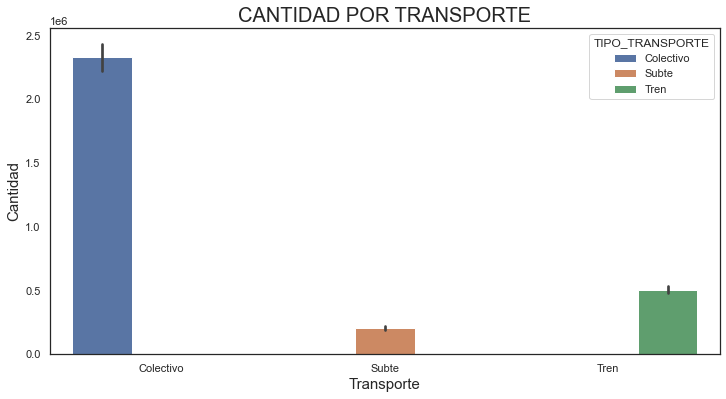

In [24]:
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(data = df,x = "TIPO_TRANSPORTE",y = 'CANTIDAD',hue = 'TIPO_TRANSPORTE')

plt.title("CANTIDAD POR TRANSPORTE", fontsize=20)
plt.xlabel('Transporte', fontsize=15) 
plt.ylabel('Cantidad', fontsize=15) 

- Por amplia diferencia, nos damos cuenta que el colectivo es el medio de transporte mas utilizado. Esto es lógico, ya que la cantidad de linea de colectivos es mucho mayor que la del subte o tren, sabiendo que ambos suelen ir bastante llenos.

## ¿Todos los meses se utilizan de igual forma el transporte?
- Podemos creer que mayormente el uso tendría que ser igual en cada época, a excepción de los meses de verano que se los asocian con las vacaciones, pero ¿Es esto así?

Text(0, 0.5, 'Cantidad')

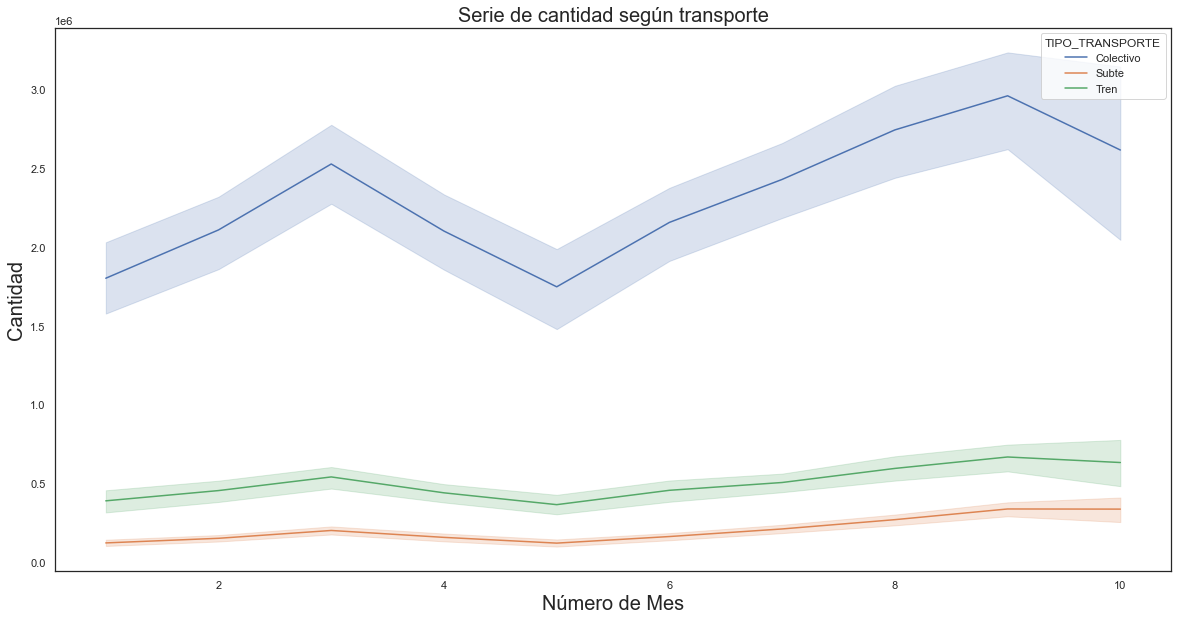

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(data=df, x=df["DIA"].dt.month, y="CANTIDAD", hue = 'TIPO_TRANSPORTE')

plt.title("Serie de cantidad según transporte", fontsize=20)
plt.xlabel('Número de Mes', fontsize=20) 
plt.ylabel('Cantidad', fontsize=20) 

- Podemos ver las estacionalidades de esta pequeña serie, dandonos cuenta de que los primeros meses comienza un ascenso hasta Marzo, que es la vuelta a clase, mostrando mínimos en Mayo, lo cual podemos asociar a la restricciones nuevas que se produjeron por covid, que si bien no fueron tan estrictas como en 2020, hicieron una diferencia en la circulación (al menos en CABA).
- También, podemos afirmar que las personas, en los primeros meses del año, no utilizan el transporte en gran medida ya que suele ser la temporada mas alta para el turismo (sobre todo en la costa).
- Finalmente, vemos una compensación en los últimos meses, volviendo a ser menores en agosto (por falta de datos).

## ¿Todos los días se utiliza de igual forma el transporte?
- Misma idea que el inciso anterior, el cual buscamos saber si hay diferencias entreo los días que utilizamos los transportes.

Text(0, 0.5, 'Cantidad')

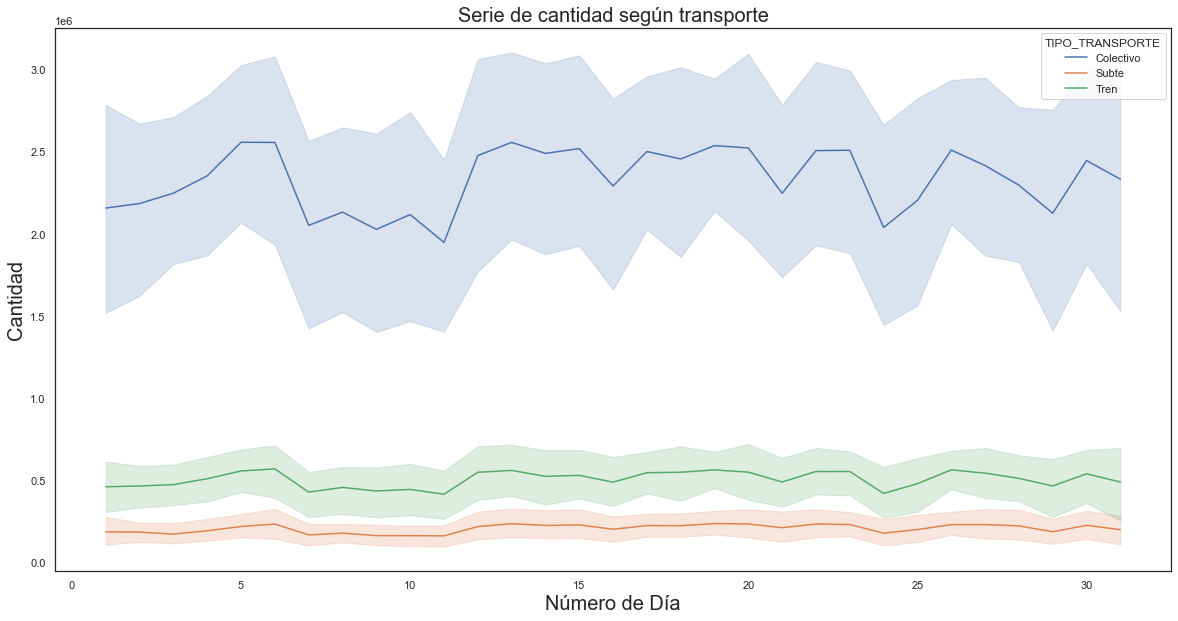

In [26]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(data=df, x=df["DIA"].dt.day, y="CANTIDAD", hue = 'TIPO_TRANSPORTE')

plt.title("Serie de cantidad según transporte", fontsize=20)
plt.xlabel('Número de Día', fontsize=20) 
plt.ylabel('Cantidad', fontsize=20) 

- A simple vista, no se puede decir que haya una gran diferencia entre los días. Sin embargo podemos observar en los días 6 a 12 aproximadamente, un cambio de tendencia, pero al haber tanta varianza es dificil de hacerlo sin un test de por medio.

## ¿Depende el uso del transporte del día?
- Clásicamente podemos asociar a los días laborales como los que mas mueven al transporte pero, ¿Es esto así?

Text(0, 0.5, 'Cantidad')

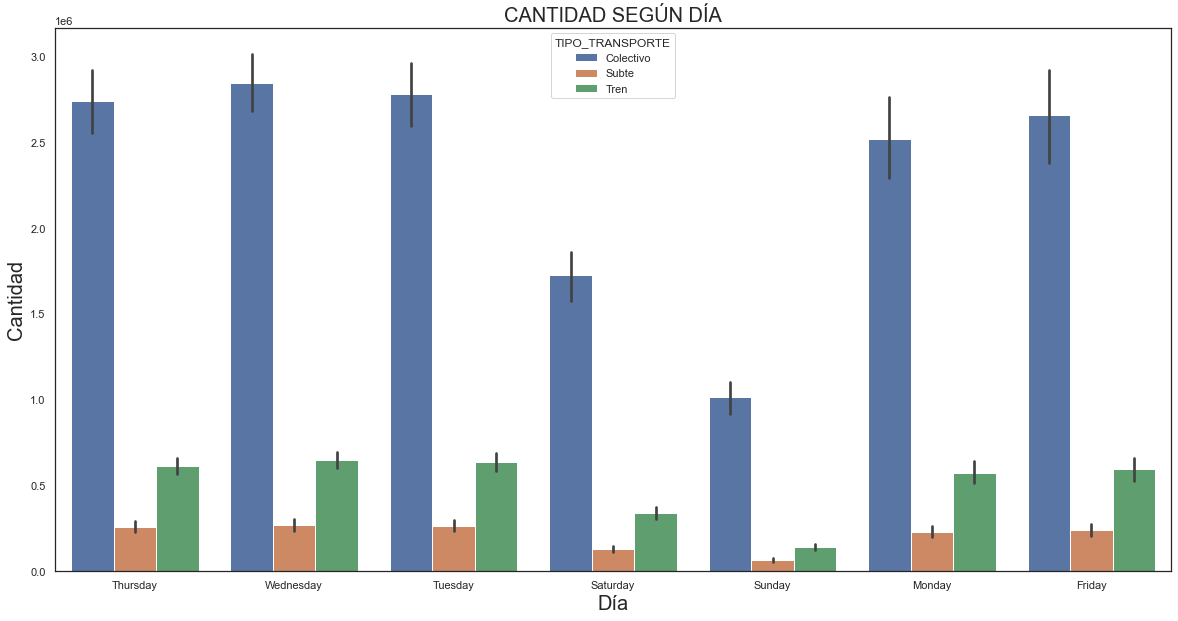

In [27]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data = df, x = "N_DIA",y = 'CANTIDAD', hue = 'TIPO_TRANSPORTE')
plt.title("CANTIDAD SEGÚN DÍA", fontsize=20)
plt.xlabel('Día', fontsize=20) 
plt.ylabel('Cantidad', fontsize=20) 

- Podemos afirmar que los días que mas utilizamos no son los del fin de semana.
- Esto lo podemos asociar no solamente al trabajo , sino también a las actividades diarias como puede ser, ir al colegio/universidad, hacer algún deporte, etc

## Siguiendo con el mismo análisis... ¿Qué ocurre con el transporte público los días feriados?
- En los días feriados, es interesante saber como utilizamos el transporte público, ya que mayormente, la frecuencia misma de los transportes, es mucho menor que en los días laborables.

Text(0, 0.5, 'Cantidad')

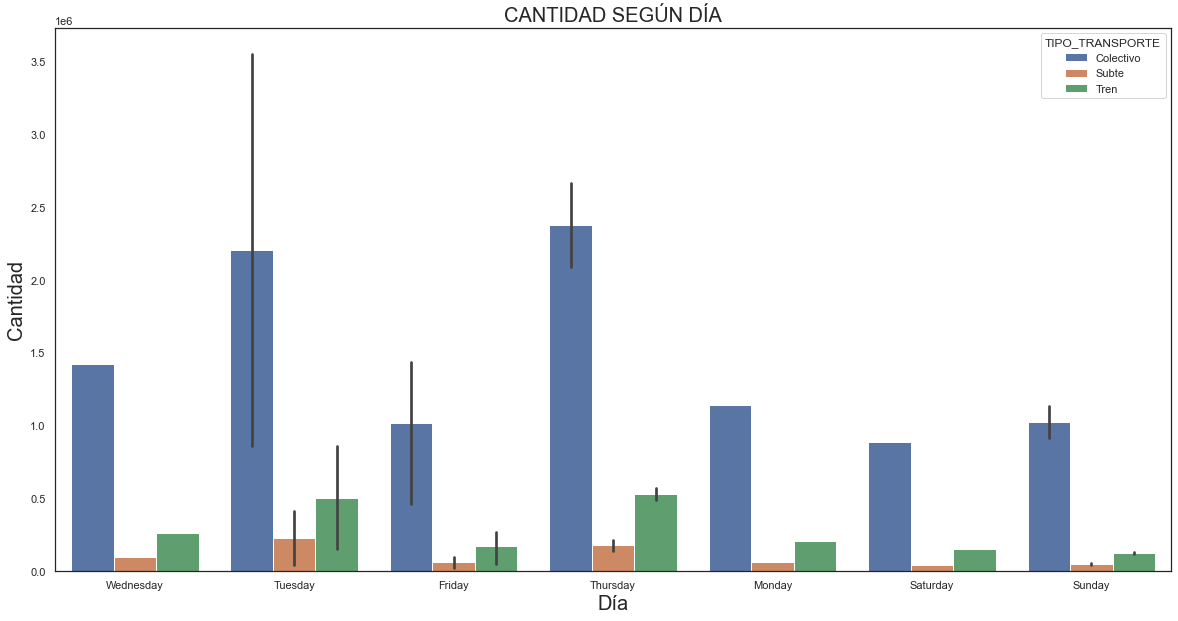

In [28]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data =df[df["FERIADO"]==1] , x = "N_DIA",y = 'CANTIDAD', hue = 'TIPO_TRANSPORTE')
plt.title("CANTIDAD SEGÚN DÍA", fontsize=20)
plt.xlabel('Día', fontsize=20) 
plt.ylabel('Cantidad', fontsize=20) 

- Con un poco de varianza en los pocos datos que hay, podemos como mínimo afirmar, que hay una menor escala de uso en comparación a dias laborables, siendo similar a los días sabados o domingos.
- Podemos asociar este comportamiento a "escapadas" que se pueden realizar estos días, sobre todo en feriados extensos, como también a que estos días las personas las usamos para descansar sin movilizarnos de nuestras casas.

## Buscando ser mas específico, sacamos la distribución de uso de cada día, según su cantidad
- Este análisis, ayudará a interprentar aún mas, la cantidad de uso que le damos al transporte en general, cada día

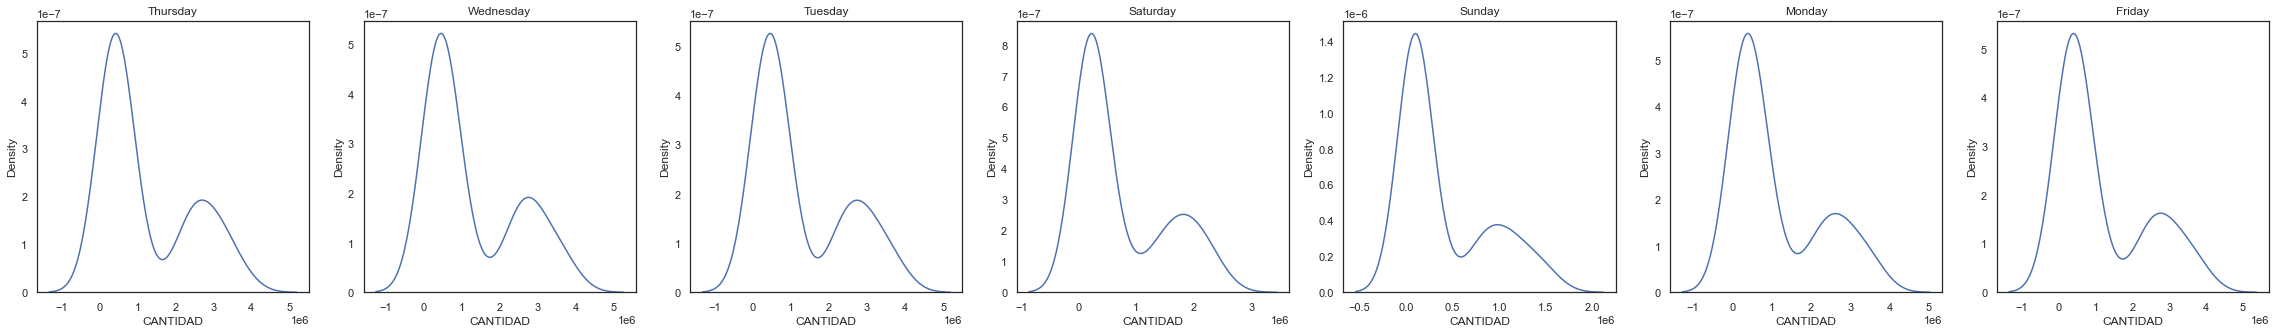

In [29]:
dias = df["N_DIA"].unique()
f, axes = plt.subplots(1, 7,figsize=(40, 5))
for h,i in enumerate(dias):
    sns.kdeplot(data=df[df["N_DIA"]==i], x="CANTIDAD",  ax=axes[h]).set(title=i)
    

- Observamos que todas los días tienen una distribución similar, tienen dos máximos.

## Conclusiones
- No se utilizan todos los transportes públicos de igual manera, ya que el colectivo predomina por los demás. 
- También, dependerá el uso del mes en el que nos encontremos, ya que es mas probable encontrar un colectivo lleno a mitad de año que a principio.
- Finalmente, el uso del colectivo depende fuertemente del día de la semana, sea fin de semana, feriado o día laboral, su uso será mayor o menor